### (1) Data Description
I found the instagram fashion dataset from Harvard database. 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/K7AW6F
The dataset is composed of information about 24,752 posts by 13,350 people on Instagram. The data collection was done over a month period in January, 2015. It included posts mentioning 48 internationally renowned fashion brand names as hashtag.

•        User Id: Numeric ID of the posting user

•        Followings: The number other users a given uploader is following (i.e., distinct sources of the uploader)

•        Followers: The number of other users subscribing to the uploader’s account (i.e., fans of the uploader)

•        Media count: The number of total posts (both fashion and non-fashion) contributed by the uploader

•        Brand name: A brand name used in fashion post search process, used as a hashtag in user’s post

•        Brand category: Grouping of a brand

•        Hashtags: The list of hashtags in a post

•        Caption: Text description of a post provided by the user, excluding the hashtag information

•        Image URL: A web link to the image file of the post

•        Likes: The total number of likes per post as well as the list of Instagram audience who liked each photo  (including their user IDs, names, and profile URLs)

•        Comments: The total number of comments as well as the list of Instagram audience who commented on the photo

•        Creation Time: When post was uploaded on Instagram

•        Link: A web URL (if any) contained in each post



In [165]:
from pandas import Series, DataFrame
from matplotlib.pyplot import *
import pandas as pd
import numpy as np
import re
import os
%matplotlib inline

In [2]:
data = pd.read_csv('fashion data on Instagram.csv', index_col = 0)

In [3]:
data.head()

,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,Comments,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
UserId,,,,,,,,,,,,,,,,,,,,,
1171579752855683619_212070047,518.0,9840.0,541,abercrombie,High street,"beautiful, summer, fashion, love, cute, food, ...","We were born to be REAL, not to be perfect. ...",https://scontent.cdninstagram.com/t51.2885-15/...,97,0,...,0.931486,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181
1171594777274371222_176762322,7333.0,2300.0,272,abercrombie,High street,"teen, model, brunette, selfie, hollister, snap...","Gotta run, but first, let me take selfie. Me...",https://scontent.cdninstagram.com/t51.2885-15/...,94,0,...,0.466329,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,91,3,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,94,3,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1171508187966229230_2797323089,132.0,456.0,56,abercrombie,High street,"abercrombieandfitch, shopping, love, hollister...",#love #shopping #shoppen #hollister #abercro...,https://scontent.cdninstagram.com/t51.2885-15/...,9,1,...,0.393063,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
data.columns

Index(['Followings', 'Followers', 'MediaCount', 'BrandName', 'BrandCategory',
       'Hashtags', 'Caption', 'ImgURL', 'Likes', 'Comments ', 'CreationTime',
       'Link', 'Selfie', 'BodySnap', 'Marketing', 'ProductOnly', 'NonFashion',
       'Face', 'Logo', 'BrandLogo', 'Smile', 'Outdoor', 'NumberOfPeople',
       'NumberOfFashionProduct', 'Anger', 'Contempt', 'Disgust', 'Fear',
       'Happiness', 'Neutral', 'Sadness', 'Surprise'],
      dtype='object')

### (2) Data Preprocessing
#### Conduct data cleaning to **1)** remove empty content; **2)** remove '\r', '\n', and punctuation; **3)** remove redundant spaces; **4)** convert all words into lower case

In [37]:
from string import punctuation

def clean(x):
    x = x.replace('\r', ' ')
    x = x.replace('\n', ' ')
    for eachpunc in punctuation:
        x = x.replace(eachpunc, ' ')
    x = re.sub(r'[£0-9]+', ' ', x)
    x = re.sub(r'[\s]+', ' ', x)
    return x.strip().lower()

In [54]:
data1 =  data[data['Hashtags'] != '']
data1 =  data[data['Caption'] != '']
data1['Hashtags'] = DataFrame(data1.Hashtags.apply(str).map(clean))
data1['Caption'] = DataFrame(data1.Caption.apply(str).map(clean))
data1 =data1[['Followers','MediaCount','BrandName','BrandCategory','Hashtags','Caption', 'Likes','Comments ']]
data1.index = np.arange(len(data1))
data1.head()

,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,Likes,Comments
0,9840.0,541,abercrombie,High street,beautiful summer fashion love cute food likefo...,we were born to be real not to be perfect aber...,97,0
1,2300.0,272,abercrombie,High street,teen model brunette selfie hollister snapchat ...,gotta run but first let me take selfie message...,94,0
2,605.0,106,abercrombie,High street,alexandani cute llbean beanboots anthropologie...,dress to impress u f,91,3
3,605.0,106,abercrombie,High street,alexandani cute llbean beanboots anthropologie...,dress to impress u f,94,3
4,456.0,56,abercrombie,High street,abercrombieandfitch shopping love hollister vi...,love shopping shoppen hollister abercrombie ab...,9,1


### (3) Exploratory data analysis 
#### plot the potential relationships 
1. Followers & MediaCount
2. Followers & Likes
3. Length of hashtag & Likes
4. Length of caption & Likes

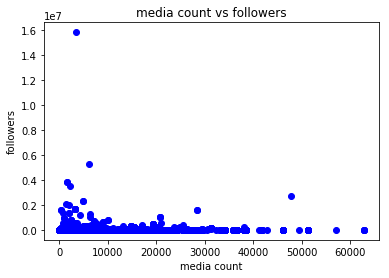

In [78]:
plot(data1['MediaCount'],data1['Followers'], marker='o', color='blue', linestyle='None')
ylabel("followers")
xlabel("media count")
title('media count vs followers')
show()

no obvious relationship between number of posts and followers

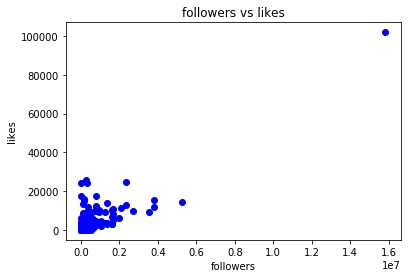

In [79]:
plot(data1['Followers'],data1['Likes'], marker='o', color='blue', linestyle='None')
ylabel("likes")
xlabel("followers")
title('followers vs likes')
show()

Pictures posted by those with more followers tend to get more likes.

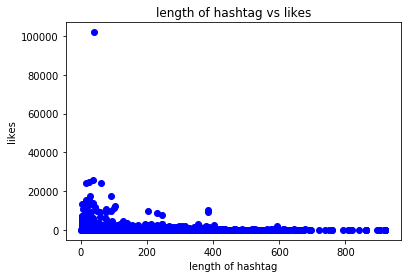

In [88]:
data1['LengthOfHashtag']=data1['Hashtags'].str.len()
plot(data1['LengthOfHashtag'],data1['Likes'], marker='o', color='blue', linestyle='None')
ylabel("likes")
xlabel("length of hashtag")
title('length of hashtag vs likes')
show()

no obvious relationship between length of hashtags and likes

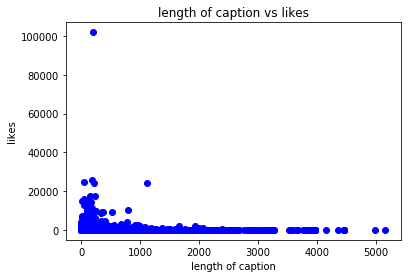

In [89]:
data1['LengthOfCaption']=data1['Caption'].str.len()
plot(data1['LengthOfCaption'],data1['Likes'], marker='o', color='blue', linestyle='None')
ylabel("likes")
xlabel("length of caption")
title('length of caption vs likes')
show()

no obvious relationship between length of caption and likes

In [119]:
len(data1['BrandName'].value_counts())

48

#### find average number of likes of different brand categories

In [214]:
avg_likes = data1.groupby('BrandCategory')['Likes'].mean().sort_values(ascending = False)
avg_likes

BrandCategory
Small couture    119.003645
Designer         102.125474
High street       99.702581
Mega couture      48.087776
Name: Likes, dtype: float64

#### find top 10 brands with largest average number of likes 

In [129]:
average_likes = data1.groupby('BrandName')['Likes'].mean().sort_values(ascending = False)
average_likes[:10]

BrandName
urbanoutfitters    273.750378
nancygonzalez      235.329616
alexanderwang      224.989362
acnestudios        191.031343
cesareattolini     182.975420
americanapparel    170.629630
isabelmarant       156.720971
kiton              136.401907
stellamccartney    134.253425
forever21          132.736559
Name: Likes, dtype: float64

Top 10 brands with largest average number of likes are urbanoutfitters, nancygonzalez, alexanderwang, acnestudios, cesareattolini, americanapparel, isabelmarant, kiton, stellamccartney, and forever21.

### 4) Topic Modeling with Latent Dirichlet Allocation (LDA)
#### Using Latent Dirichlet Allocation (LDA) to generate 10 topics (by default) from hashtag and caption

In [178]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

data1['HashtagCaption']=data1['Hashtags'].astype(str) + ' ' + data1['Caption']

wordcounter = CountVectorizer(max_df = 0.95, min_df = 10, stop_words = 'english')
document_dtm = wordcounter.fit_transform(data1['HashtagCaption']).todense()
lda = LatentDirichletAllocation(random_state = 300)
document_topic = lda.fit_transform(document_dtm)

def print_topic_word(x):
    topic = x.name
    top10_word = ' '.join(x.sort_values(ascending = False)[:10].index.tolist())
    print(topic + ': ' + top10_word)
    return

word_topic_df = DataFrame(lda.components_.T, index = wordcounter.get_feature_names(), columns = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'])
result = word_topic_df.apply(print_topic_word)

/Users/tammy/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topic 1: fc af ab eb ea cb ec uff ed theory
Topic 2: fashion sandro kiton maisonmargiela shoes menswear vintage clothes dolls fw
Topic 3: zara siambrandname topshop sbn mango ufe marcjacobs kloset sale lynaround
Topic 4: like follow ermenegildozegna women nike indonesia adidas london dm apparel
Topic 5: paris calvinklein love art fall beauty free model fashionweek fallwinter
Topic 6: xe viviennewestwood bags menswear cesareattolini xf mensfashion handmade russia luxury
Topic 7: com michaelkors coach katespade ysl marcbymarcjacobs myluxefashions dress mk thailand
Topic 8: fashion style ootd vince outfit love rebeccaminkoff instafashion fashionblogger nancygonzalez
Topic 9: uc ub ud ac dc uae uac ubc uce uadf
Topic 10: chanel ufe dior prada hermes gucci louisvuitton valentino fendi celine


I extract the following 8 groups of brands and keywords are mentioned together frequently. Topic 1 and Topic 9 are removed because they seem irrelevant.

Group1: fashion sandro kiton maisonmargiela shoes menswear vintage clothes dolls fw

Group2: zara siambrandname topshop sbn mango ufe marcjacobs kloset sale lynaround

Group3: ermenegildozegna women nike indonesia adidas london dm

Group4: paris calvinklein love art fall beauty free model fashionweek fallwinter

Group5: xe viviennewestwood bags menswear cesareattolini xf mensfashion handmade russia luxury

Group6: com michaelkors coach katespade ysl marcbymarcjacobs myluxefashions dress mk thailand

Group7: fashion style ootd vince outfit rebeccaminkoff instafashion fashionblogger nancygonzalez

Group8: chanel ufe dior prada hermes gucci louisvuitton valentino fendi celine

### 5) Association Between Topics

In [208]:
topic1 = ['fashion', 'sandro', 'kiton', 'maisonmargiela', 'shoes', 'menswear', 'vintage', 'clothes', 'dolls', 'fw']

topic2 = ['zara','siambrandname', 'topshop', 'sbn', 'mango', 'ufe', 'marcjacobs', 'kloset', 'sale', 'lynaround']

topic3 = ['ermenegildozegna', 'women', 'nike', 'indonesia', 'adidas','london', 'dm']

topic4 = ['paris', 'calvinklein', 'love', 'art', 'fall', 'beauty', 'free', 'model', 'fashionweek', 'fallwinter']

topic5 = ['xe', 'viviennewestwood', 'bags', 'menswear', 'cesareattolini', 'xf', 'mensfashion', 'handmade', 'russia', 'luxury']

topic6 = ['com', 'michaelkors', 'coach', 'katespade', 'ysl', 'marcbymarcjacobs', 'myluxefashions', 'dress', 'mk', 'thailand']

topic7 = ['fashion', 'style', 'ootd', 'vince', 'outfit',  'rebeccaminkoff', 'instafashion', 'fashionblogger', 'nancygonzalez']

topic8 = ['chanel', 'ufe', 'dior','prada', 'hermes', 'gucci', 'louisvuitton', 'valentino', 'fendi', 'celine']



In [209]:
def topic_replace(x):
    for a in topic1:
        if a in x.split(' '):
            x = x.replace(a, 'topic1')
    for b in topic2:
        if b in x.split(' '):
            x = x.replace(b, 'topic2')
    for c in topic3:
        if c in x.split(' '):
            x = x.replace(c, 'topic3')
    for d in topic4:
        if d in x.split(' '):
            x = x.replace(d, 'topic4')
    for e in topic5:
        if e in x.split(' '):
            x = x.replace(e, 'topic5')
    for f in topic6:
        if f in x.split(' '):
            x = x.replace(f, 'topic6')
    for g in topic7:
        if g in x.split(' '):
            x = x.replace(g, 'topic7')
    for h in topic8:
        if h in x.split(' '):
            x = x.replace(h, 'topic8')
    return x

data_caption_topic = data1['Caption'].map(topic_replace)

In [211]:
wordcounter_topic = CountVectorizer(max_df = 0.95, min_df = 10, stop_words = 'english')
dtm_caption_topic = wordcounter_topic.fit_transform(data_caption_topic).todense()
dtm_caption_topic_df = DataFrame(dtm_caption_topic, columns = wordcounter_topic.get_feature_names())
topic_list = ['topic1', 'topic2', 'topic3','topic4','topic5', 'topic6', 'topic7', 'topic8']
lift_topic_df = DataFrame(np.zeros((8, 8)), columns = topic_list, index = topic_list)
for i, eachA in enumerate(lift_topic_df):
    sumA = dtm_caption_topic_df[eachA].sum()
    for j, eachB in enumerate(lift_topic_df):
        sumB = dtm_caption_topic_df[eachB].sum()
        newss = dtm_caption_topic_df[eachA] + dtm_caption_topic_df[eachB]
        sumAB = (newss == 2).sum()
        lift = (sumAB * len(dtm_caption_topic_df)) / (sumA * sumB)
        lift_topic_df.iloc[i, j] = lift
        lift_topic_df.iloc[i, i] = np.nan
lift_topic_df


,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
topic1,NaN,0.360301,1.117919,0.814897,0.592793,0.529435,0.576022,0.264116
topic2,0.360301,NaN,0.684579,0.574474,0.439880,0.229972,0.426841,0.141367
topic3,1.117919,0.684579,NaN,1.360866,1.163419,0.664156,1.307233,0.350995
topic4,0.814897,0.574474,1.360866,NaN,1.006136,0.718623,1.169975,0.339161
topic5,0.592793,0.439880,1.163419,1.006136,NaN,0.509559,0.842849,0.257071
topic6,0.529435,0.229972,0.664156,0.718623,0.509559,NaN,0.654602,0.172060
topic7,0.576022,0.426841,1.307233,1.169975,0.842849,0.654602,NaN,0.343234
topic8,0.264116,0.141367,0.350995,0.339161,0.257071,0.172060,0.343234,NaN


Topic 3 and Topic 7, lift value = 1.31

topic3 = ['ermenegildozegna', 'women', 'nike', 'indonesia', 'adidas','london', 'dm']

topic7 = ['fashion', 'style', 'ootd', 'vince', 'outfit',  'rebeccaminkoff', 'instafashion', 'fashionblogger', 'nancygonzalez']

A lift value larger than 1 means that two items occur together more often than if they were independent 

Therefore, these two topics can be considered occur together frequently.

### (6) Conclusion
##### Process: Data Preprocessing--> Exploratory data analysis -->Topic Modeling with Latent Dirichlet Allocation (LDA) --> Association Between Topics

#### from EDA

1） It shows no obvious relationship between number of posts & number of followers

2） It shows no obvious relationship between length of hashtags/caption & number of likes.

3） There are four brand catogories. The brand catogory getting largest number of likes per post is Small Couture, which gets around 119 likes per post. The second catogory is Designer, which gets around 102 likes per post. The third and the last are High Street and Mega couture, which respectively get about 100 and 48 likes per post. Therefore, it shows that Small Couture posts may have the highest engagement rate while Mega couture has the least.

The brands of each category are listed as below.

###### Small couture	
brioni, brunellocucinelli, cesareattolini, ermenegildozegna, fabianafilippi, kiton, loropiana, nancygonzalez
###### Designer	
acnestudios, alexandermcqueen, alexanderwang, coach, dvf, iro, isabelmarant, katespade, maisonmargiela, marcbymarcjacobs, marcjacobs, michaelkors, paulsmith, rebeccaminkoff, sandro, stellamccartney, theory, vince, viviennewestwood
###### High street	
abercrombie, americanapparel, americaneagle, calvinklein, forever21, gap, hollister, jcrew, mango, topshop, uniqlo, urbanoutfitters, zara
###### Mega couture: 
burberry, cartier, chanel, gucci, hermes, louisvuitton, prada, tiffany

4） Top 10 brands with largest average number of likes are urbanoutfitters, nancygonzalez, alexanderwang, acnestudios, cesareattolini, americanapparel, isabelmarant, kiton, stellamccartney, and forever21.


#### from Topic Modeling
5） The following 8 groups of brands and keywords are mentioned together frequently. 

Group1: fashion sandro kiton maisonmargiela shoes menswear vintage clothes dolls fw

Group2: zara siambrandname topshop sbn mango ufe marcjacobs kloset sale lynaround

Group3: ermenegildozegna women nike indonesia adidas london dm

Group4: paris calvinklein love art fall beauty free model fashionweek fallwinter

Group5: xe viviennewestwood bags menswear cesareattolini xf mensfashion handmade russia luxury

Group6: com michaelkors coach katespade ysl marcbymarcjacobs myluxefashions dress mk thailand

Group7: fashion style ootd vince outfit rebeccaminkoff instafashion fashionblogger nancygonzalez

Group8: chanel ufe dior prada hermes gucci louisvuitton valentino fendi celine



     Therefore, when users show interest in a specific brand or topic, they are very likely to search for other brands or keywords in the same group.
#### from calculation of lift
6） Lift value measures the association between topics. Based on the calculation (table shown above), Topic 3 and Topic 7 occur together frequently, which means that people interested in topic 3 may also search for keywords in topic 7.

topic3 = ['ermenegildozegna', 'women', 'nike', 'indonesia', 'adidas','london', 'dm']

topic7 = ['fashion', 'style', 'ootd', 'vince', 'outfit', 'rebeccaminkoff', 'instafashion', 'fashionblogger', 'nancygonzalez']

Topic 3 and Topic 7, lift value = 1.31

A lift value larger than 1 means that two items occur together more often than if they were independent.
